# Importing all needed libraries

In [1]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import Recommenders
import matplotlib.pyplot as plt
from file_functions import load_dataset
import time
import Evaluation

# Downloading datasets

**For the first time, the function can take a long time, since it needs to download two large enough datasets.**

We check that the data files are downloaded, if not downloaded, then and saved to a file, if downloaded, then just read from the file.

We are using https://static.turi.com/datasets/millionsong/10000.txt set, as it is a subset of a million set of songs. Million songs set holds more than 600 GB of data, while its subset takes up far less. Also, to get more information about songs, we are using https://static.turi.com/datasets/millionsong/song_data.csv. With this set, we have a song name, artist name, and album name — all other things we don't need, as we don't make a deep analysis of the song.

In [2]:
# !songs = load_dataset('./data', 'https://static.turi.com/datasets/millionsong/10000.txt', 'https://static.turi.com/datasets/millionsong/song_data.csv', 'song.csv')

# Data analysis and simple data preprocessing

## Basic analysis

In [3]:
songs = pd.read_csv('data//song.csv', delimiter=';')

In [4]:
songs

,user_id,song_id,listen_count,title,release,artist_name,year,loudness,instrumentalness,liveness,valence,speechiness,danceability,acousticness,energy,duration_ms,tempo
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2,Entre Dos Aguas,Flamenco Para Niños,Paco De Lucia,1976,0.458,0.657,-12.020,0.0346,0.933000,0.878000,0.0842,0.914,102.450,361867
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1,Stronger,Graduation,Kanye West,2007,0.617,0.717,-7.858,0.1530,0.005640,0.000000,0.4080,0.490,103.992,311867
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBYHAJ12A6701BF1D,1,Constellations,In Between Dreams,Jack Johnson,2005,0.705,0.309,-12.596,0.0363,0.476000,0.000038,0.1140,0.426,122.039,201653
3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODACBL12A8C13C273,1,Learn To Fly,There Is Nothing Left To Lose,Foo Fighters,1999,0.465,0.919,-4.025,0.0408,0.000018,0.000021,0.2620,0.537,135.997,235293
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODDNQT12A6D4F5F7E,5,Apuesta Por El Rock 'N' Roll,Antología Audiovisual,Héroes del Silencio,2007,0.444,0.889,-3.756,0.1050,0.273000,0.000278,0.1930,0.633,169.907,231307
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37091,549f1efa898897a2fa99a5f8b7770a23c00251f8,SOZTEZR12A8C14204B,5,Making Money Off God feat. Bus Driver,B-Boys In Occupied Mexico,2Mex,0,0.688,0.562,-6.636,0.1860,0.069300,0.000000,0.1120,0.099,100.813,243013
37092,befdd50134a9ad0e512d1604d057b540cbef87dd,SOAHVBG12A8C1439A1,4,Anoche Soñé Contigo,Logo,Kevin Johansen,2007,0.565,0.547,-9.129,0.0385,0.416000,0.000000,0.1020,0.399,91.950,244933
37093,befdd50134a9ad0e512d1604d057b540cbef87dd,SOBRFPG12A8AE4837D,1,El Novio Del Olvido,Alta Suciedad,Andres Calamaro,1997,0.663,0.190,-13.970,0.0417,0.912000,0.000087,0.1100,0.271,112.914,144600
37094,befdd50134a9ad0e512d1604d057b540cbef87dd,SOBSIFR12A6D4F8560,1,Geek In The Pink [Phil Tan Remix],Geekin' Out Across The Galaxy,Jason Mraz,2006,0.664,0.843,-4.697,0.1020,0.085500,0.000000,0.3190,0.808,95.095,218413


We drop all None values from the dataset.

We output the number of empty values before deleting them because, after that, they will be removed from the dataset, so that we will receive zeros.

In [5]:
print(songs.isnull().sum())
songs.dropna(inplace=True)

user_id             0
song_id             0
listen_count        0
title               0
release             0
artist_name         0
year                0
loudness            0
instrumentalness    0
liveness            0
valence             0
speechiness         0
danceability        0
acousticness        0
energy              0
duration_ms         0
tempo               0
dtype: int64


In [6]:
songs.describe()

,listen_count,year,loudness,instrumentalness,liveness,valence,speechiness,danceability,acousticness,energy,duration_ms,tempo
count,37096.000000,37096.000000,37096.000000,37096.000000,37096.000000,37096.000000,37096.000000,37096.000000,37096.000000,37096.000000,37096.000000,3.709600e+04
mean,2.978704,1770.736575,0.564307,0.674340,-7.621558,0.072374,0.218565,0.117728,0.199821,0.503097,122.501561,2.477390e+05
std,7.530661,638.551511,0.162418,0.216756,3.669764,0.081191,0.282609,0.258588,0.166488,0.247026,27.623070,8.412449e+04
min,1.000000,0.000000,0.060500,0.000020,-36.856000,0.022500,0.000002,0.000000,0.010100,0.011500,46.739000,1.976000e+04
25%,1.000000,1992.000000,0.457000,0.530000,-9.264000,0.033100,0.007330,0.000000,0.096900,0.310000,101.038000,2.033470e+05
50%,1.000000,2003.000000,0.572000,0.716000,-6.799000,0.043750,0.071700,0.000179,0.132000,0.501000,121.610000,2.352670e+05
75%,3.000000,2007.000000,0.677000,0.851000,-5.115750,0.070825,0.345000,0.033325,0.264000,0.701000,139.961000,2.773070e+05
max,796.000000,2010.000000,0.977000,0.998000,2.644000,0.957000,0.994000,0.993000,1.000000,0.990000,215.918000,3.025000e+06


In [7]:
songs.columns

Index(['user_id', 'song_id', 'listen_count', 'title', 'release', 'artist_name',
       'year', 'loudness', 'instrumentalness', 'liveness', 'valence',
       'speechiness', 'danceability', 'acousticness', 'energy', 'duration_ms',
       'tempo'],
      dtype='object')

## Basic preprocess of data

We are adding a couple of new columns to our datasheet, as we want to save the past columns so that we can list the song names in the end.

This couple of columns is encoded columns of user id song id, album name and artist_name. We change user_id to our encoded user_id, as it is coded in start dataset, so that it wouldn't give us any information.

In [8]:
le = LabelEncoder()
songs['user_id'] = le.fit_transform(songs['user_id'])
songs['year'] = pd.to_numeric(songs['year'])
songs['song_id'] = le.fit_transform(songs['song_id'])
songs['encoded_artist_name'] = le.fit_transform(songs['artist_name'])
songs['encoded_release'] = le.fit_transform(songs['release'])
songs.head()

,user_id,song_id,listen_count,title,release,artist_name,year,loudness,instrumentalness,liveness,valence,speechiness,danceability,acousticness,energy,duration_ms,tempo,encoded_artist_name,encoded_release
0,1337,281,2,Entre Dos Aguas,Flamenco Para Niños,Paco De Lucia,1976,0.458,0.657,-12.020,0.0346,0.933000,0.878000,0.0842,0.914,102.450,361867,1571,1090
1,1337,516,1,Stronger,Graduation,Kanye West,2007,0.617,0.717,-7.858,0.1530,0.005640,0.000000,0.4080,0.490,103.992,311867,1110,1240
2,1337,526,1,Constellations,In Between Dreams,Jack Johnson,2005,0.705,0.309,-12.596,0.0363,0.476000,0.000038,0.1140,0.426,122.039,201653,971,1485
3,1337,832,1,Learn To Fly,There Is Nothing Left To Lose,Foo Fighters,1999,0.465,0.919,-4.025,0.0408,0.000018,0.000021,0.2620,0.537,135.997,235293,809,3392
4,1337,863,5,Apuesta Por El Rock 'N' Roll,Antología Audiovisual,Héroes del Silencio,2007,0.444,0.889,-3.756,0.1050,0.273000,0.000278,0.1930,0.633,169.907,231307,937,254


## Replace zero's from dataset

In [9]:
song_df = songs
song_df.replace(0, 0.00000001, inplace=True)
song_df.head()

,user_id,song_id,listen_count,title,release,artist_name,year,loudness,instrumentalness,liveness,valence,speechiness,danceability,acousticness,energy,duration_ms,tempo,encoded_artist_name,encoded_release
0,1337.0,281.0,2,Entre Dos Aguas,Flamenco Para Niños,Paco De Lucia,1976.0,0.458,0.657,-12.020,0.0346,0.933000,8.780000e-01,0.0842,0.914,102.450,361867,1571.0,1090.0
1,1337.0,516.0,1,Stronger,Graduation,Kanye West,2007.0,0.617,0.717,-7.858,0.1530,0.005640,1.000000e-08,0.4080,0.490,103.992,311867,1110.0,1240.0
2,1337.0,526.0,1,Constellations,In Between Dreams,Jack Johnson,2005.0,0.705,0.309,-12.596,0.0363,0.476000,3.760000e-05,0.1140,0.426,122.039,201653,971.0,1485.0
3,1337.0,832.0,1,Learn To Fly,There Is Nothing Left To Lose,Foo Fighters,1999.0,0.465,0.919,-4.025,0.0408,0.000018,2.070000e-05,0.2620,0.537,135.997,235293,809.0,3392.0
4,1337.0,863.0,5,Apuesta Por El Rock 'N' Roll,Antología Audiovisual,Héroes del Silencio,2007.0,0.444,0.889,-3.756,0.1050,0.273000,2.780000e-04,0.1930,0.633,169.907,231307,937.0,254.0


## Advanced data analysis

In [10]:
data = song_df.drop(["title", "release", "artist_name"], axis=1)
#g = sns.pairplot(data, palette="husl")

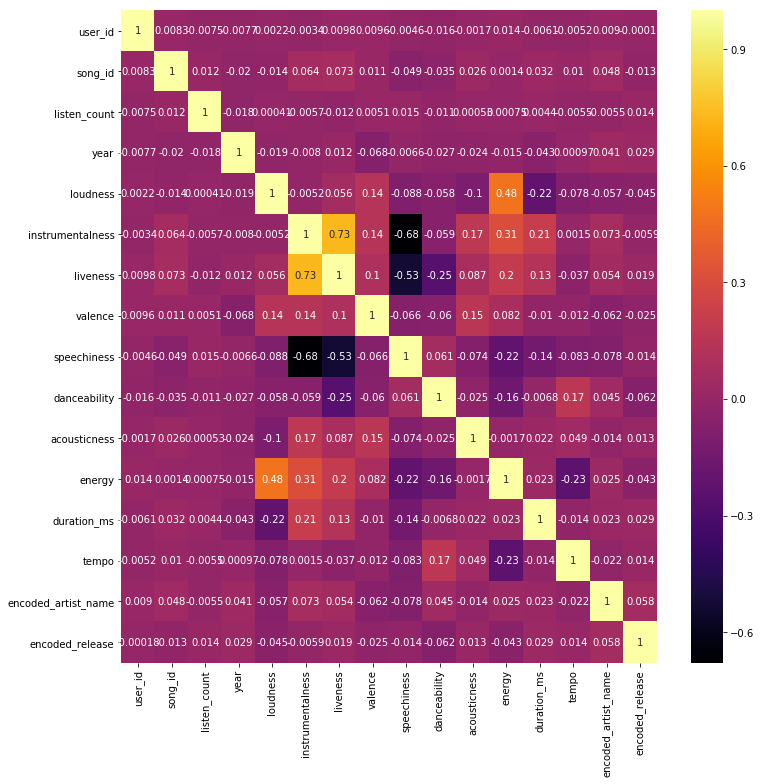

In [11]:
plt.figure(figsize=(12, 12))
sns.heatmap(data.corr(), annot=True, cmap='inferno');

## Create a subset of the dataset

In [12]:
#Merge song title and artist_name columns to make a merged column
song_df['song'] = song_df['title'].map(str) + " - " + song_df['artist_name']

## Showing the most popular songs in the dataset

In [13]:
song_grouped = song_df.groupby(['song']).agg({'listen_count': 'count'}).reset_index()
grouped_sum = song_grouped['listen_count'].sum()
song_grouped['percentage']  = song_grouped['listen_count'].div(grouped_sum)*100
song_grouped.sort_values(['listen_count', 'song'], ascending = [0,1])

,song,listen_count,percentage
6299,Undo - Björk,182,0.490619
4645,Revelry - Kings Of Leon,166,0.447488
4896,Secrets - OneRepublic,158,0.425922
1862,Fireflies - Charttraxx Karaoke,128,0.345051
6119,Tive Sim - Cartola,117,0.315398
...,...,...,...
6853,Your Rap Is Sad - Carlos Jean,1,0.002696
6858,Your Time Has Come - Audioslave,1,0.002696
6875,clouding - Four Tet,1,0.002696
6876,high fives - Four Tet,1,0.002696


## Count number of unique users in the dataset

Count number of unique users in the dataset

In [14]:
users = song_df['user_id'].unique()
len(users)

1871

## Quiz 1. Count the number of unique songs in the dataset

In [15]:
###Fill in the code here
songs = song_df['song'].unique()
len(songs)

6886

## Create a song recommender

In [16]:
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(song_df, test_size = 0.20, random_state=0)
train_data.head()

,user_id,song_id,listen_count,title,release,artist_name,year,loudness,instrumentalness,liveness,valence,speechiness,danceability,acousticness,energy,duration_ms,tempo,encoded_artist_name,encoded_release,song
27005,320.0,2287.0,1,R.A.K.I.M.,8 Mile,Rakim,2002.0,0.614,0.976,-2.320,0.2720,0.06540,1.000000e-08,0.0469,0.554,93.791,263493,1668.0,79.0,R.A.K.I.M. - Rakim
6439,1850.0,1158.0,1,Song For Guy,A Single Man,Elton John,1978.0,0.459,0.165,-15.950,0.0470,0.01750,2.760000e-04,0.0895,0.123,122.861,413867,694.0,120.0,Song For Guy - Elton John
17239,348.0,2382.0,1,Alpha Male,The Understanding,Röyksopp,2005.0,0.256,0.634,-7.254,0.0294,0.03560,8.960000e-01,0.0573,0.132,134.826,490777,1752.0,3337.0,Alpha Male - Röyksopp
5288,714.0,78.0,3,The Webs We Weave,Dying Is Your Latest Fashion,Escape The Fate,2006.0,0.488,0.954,-3.784,0.1230,0.00243,1.000000e-08,0.2350,0.568,105.356,173733,740.0,890.0,The Webs We Weave - Escape The Fate
28591,177.0,1794.0,1,June 9th,Hi Scores,Boards of Canada,1996.0,0.642,0.931,-11.299,0.0632,0.33000,8.330000e-01,0.1800,0.354,123.029,318240,290.0,1357.0,June 9th - Boards of Canada


## Simple popularity-based recommender class (Can be used as a black box)

### Create an instance of popularity based recommender class

In [17]:
pm = Recommenders.PopularityRecommender()
pm.create(train_data, 'user_id', 'song')

### Use the popularity model to make some predictions

In [18]:
user_id = users[5]
pm.recommend(user_id)

,user_id,song,score,Rank
6029,559.0,Undo - Björk,147,1.0
4444,559.0,Revelry - Kings Of Leon,139,2.0
4681,559.0,Secrets - OneRepublic,128,3.0
1776,559.0,Fireflies - Charttraxx Karaoke,102,4.0
5856,559.0,Tive Sim - Cartola,93,5.0
3379,559.0,Marry Me - Train,83,6.0
5637,559.0,The Scientist - Coldplay,81,7.0
6064,559.0,Use Somebody - Kings Of Leon,76,8.0
1449,559.0,Drop The World - Lil Wayne / Eminem,75,9.0
892,559.0,Canada - Five Iron Frenzy,66,10.0


### Quiz 2: Use the popularity based model to make predictions for the following user id (Note the difference in recommendations from the first user id).

In [19]:
###Fill in the code here
user_id = users[8]
pm.recommend(user_id)

,user_id,song,score,Rank
6029,1136.0,Undo - Björk,147,1.0
4444,1136.0,Revelry - Kings Of Leon,139,2.0
4681,1136.0,Secrets - OneRepublic,128,3.0
1776,1136.0,Fireflies - Charttraxx Karaoke,102,4.0
5856,1136.0,Tive Sim - Cartola,93,5.0
3379,1136.0,Marry Me - Train,83,6.0
5637,1136.0,The Scientist - Coldplay,81,7.0
6064,1136.0,Use Somebody - Kings Of Leon,76,8.0
1449,1136.0,Drop The World - Lil Wayne / Eminem,75,9.0
892,1136.0,Canada - Five Iron Frenzy,66,10.0


## Build a song recommender with personalization

We now create an item similarity based collaborative filtering model that allows us to make personalized recommendations to each user.

### Create an instance of item similarity based recommender class

In [20]:
is_model = Recommenders.ItemSimilarityRecommender()
is_model.create(train_data, 'user_id', 'song')

### Use the personalized model to make some song recommendations

In [21]:
#Print the songs for the user in training data
user_id = users[5]
user_items = is_model.get_user_items(user_id)
#
print("------------------------------------------------------------------------------------")
print("Training data songs for the user userid: %s:" % user_id)
print("------------------------------------------------------------------------------------")

for user_item in user_items:
    print(user_item)

print("----------------------------------------------------------------------")
print("Recommendation process going on:")
print("----------------------------------------------------------------------")

#Recommend songs for the user using personalized model
is_model.recommend(user_id)

------------------------------------------------------------------------------------
Training data songs for the user userid: 559.0:
------------------------------------------------------------------------------------
Without Me - Eminem
16 Candles - The Crests
Somebody To Love - Justin Bieber
Ghosts 'n' Stuff (Original Instrumental Mix) - Deadmau5
Speechless - Lady GaGa
Missing You - John Waite
----------------------------------------------------------------------
Recommendation process going on:
----------------------------------------------------------------------
No. of unique songs for the user: 6
no. of unique songs in the training set: 6593
Non zero values in cooccurence_matrix :3949


,user_id,song,score,rank
0,559.0,One Time - Justin Bieber,0.069541,1
1,559.0,Drop The World - Lil Wayne / Eminem,0.065864,2
2,559.0,Heartbreak Warfare - John Mayer,0.062661,3
3,559.0,Pursuit Of Happiness (nightmare) - Kid Cudi / ...,0.061439,4
4,559.0,The Real Slim Shady - Eminem,0.060309,5
5,559.0,Superman - Eminem / Dina Rae,0.060116,6
6,559.0,If I Had You - Adam Lambert,0.057470,7
7,559.0,Alejandro - Lady GaGa,0.056144,8
8,559.0,Love Story - Taylor Swift,0.055699,9
9,559.0,Love Me - Justin Bieber,0.055355,10


### Quiz 3. Use the personalized model to make recommendations for the following user id. (Note the difference in recommendations from the first user id.)

In [22]:
user_id = users[11]
#Fill in the code here
user_items = is_model.get_user_items(user_id)
#
print("------------------------------------------------------------------------------------")
print("Training data songs for the user userid: %s:" % user_id)
print("------------------------------------------------------------------------------------")

for user_item in user_items:
    print(user_item)

print("----------------------------------------------------------------------")
print("Recommendation process going on:")
print("----------------------------------------------------------------------")

#Recommend songs for the user using personalized model
is_model.recommend(user_id)


------------------------------------------------------------------------------------
Training data songs for the user userid: 1573.0:
------------------------------------------------------------------------------------
Black and White - The String Cheese Incident
Strange Days - The Doors
Secrets - OneRepublic
Here Without You - 3 Doors Down
S.O.S. - Jonas Brothers
Lovebug - Jonas Brothers
Drops Of Jupiter - Train
Speed Of Life - Sugarland
Love Story - Taylor Swift
When You Were Young - The Killers
Uprising - Muse
Home - Daughtry
I Kissed A Girl - Katy Perry
Marry Me - Train
Don't Dream It's Over - Crowded House
Half Of My Heart - John Mayer
The Trouble With Love Is - Kelly Clarkson
Ghosts and Roses - Stephane Pompougnac
Blood Red - Slayer
If I Had You - Adam Lambert
Harder Better Faster Stronger - Daft Punk
Fireflies - Charttraxx Karaoke
Breakfast At Tiffany's - Deep Blue Something
Use Somebody - Kings Of Leon
Heartbreak Warfare - John Mayer
Breakeven - The Script
Magic - Selena Gomez


,user_id,song,score,rank
0,1573.0,Alejandro - Lady GaGa,0.067073,1
1,1573.0,Drop The World - Lil Wayne / Eminem,0.064793,2
2,1573.0,Bleed It Out [Live At Milton Keynes] - Linkin ...,0.064708,3
3,1573.0,Pursuit Of Happiness (nightmare) - Kid Cudi / ...,0.064631,4
4,1573.0,The Scientist - Coldplay,0.063772,5
5,1573.0,Whataya Want From Me - Adam Lambert,0.062739,6
6,1573.0,Monster - Lady GaGa,0.059395,7
7,1573.0,Cosmic Love - Florence + The Machine,0.058993,8
8,1573.0,You Belong With Me - Taylor Swift,0.057679,9
9,1573.0,Fix You - Coldplay,0.056958,10


### We can also apply the model to find similar songs to any song in the dataset

In [23]:
is_model.get_similar_items(['U Smile - Justin Bieber'])

no. of unique songs in the training set: 6593
Non zero values in cooccurence_matrix :664


,user_id,song,score,rank
0,,One Time - Justin Bieber,0.176471,1
1,,Stuck In The Moment - Justin Bieber,0.171429,2
2,,One Less Lonely Girl - Justin Bieber,0.170732,3
3,,Love Me - Justin Bieber,0.170213,4
4,,Cosmic Love - Florence + The Machine,0.161290,5
5,,That Should Be Me - Justin Bieber,0.159091,6
6,,Somebody To Love - Justin Bieber,0.144928,7
7,,Monster - Lady GaGa,0.142857,8
8,,Heartbreak Warfare - John Mayer,0.140625,9
9,,Savior - Rise Against,0.140351,10


### Quiz 4. Use the personalized recommender model to get similar songs for the following song.

In [24]:
song = 'Yellow - Coldplay'
###Fill in the code here
is_model.get_similar_items([song])

no. of unique songs in the training set: 6593
Non zero values in cooccurence_matrix :1497


,user_id,song,score,rank
0,,Fix You - Coldplay,0.244186,1
1,,The Scientist - Coldplay,0.188034,2
2,,Clocks - Coldplay,0.169811,3
3,,Speed Of Sound - Coldplay,0.136986,4
4,,In My Place - Coldplay,0.129870,5
5,,Use Somebody - Kings Of Leon,0.126050,6
6,,Cosmic Love - Florence + The Machine,0.119565,7
7,,When You Were Young - The Killers,0.119565,8
8,,Shiver - Coldplay,0.118421,9
9,,Spies - Coldplay,0.114754,10


# Quantitative comparison between the models

We now formally compare the popularity and the personalized models using precision-recall curves. 

## Class to calculate precision and recall (This can be used as a black box)

In [25]:
#Evaluation.precision_recall_calculator

## Use the above precision recall calculator class to calculate the evaluation measures

In [26]:
start = time.time()

#Define what percentage of users to use for precision recall calculation
user_sample = 0.05

#Instantiate the precision_recall_calculator class
pr = Evaluation.PrecisionRecallCalculator(test_data, train_data, pm, is_model)

#Call method to calculate precision and recall values
(pm_avg_precision_list, pm_avg_recall_list, ism_avg_precision_list, ism_avg_recall_list) = pr.calculate_measures(user_sample)

end = time.time()
print("Execution time in minutes"(end - start)/60)

Length of user_test_and_training:1550
Length of user sample:77
Getting recommendations for user:958.0
No. of unique songs for the user: 11
no. of unique songs in the training set: 6593
Non zero values in cooccurence_matrix :5928
Getting recommendations for user:1048.0
No. of unique songs for the user: 28
no. of unique songs in the training set: 6593
Non zero values in cooccurence_matrix :13682
Getting recommendations for user:102.0
No. of unique songs for the user: 20
no. of unique songs in the training set: 6593
Non zero values in cooccurence_matrix :7961
Getting recommendations for user:649.0
No. of unique songs for the user: 17
no. of unique songs in the training set: 6593
Non zero values in cooccurence_matrix :9940
Getting recommendations for user:1273.0
No. of unique songs for the user: 11
no. of unique songs in the training set: 6593
Non zero values in cooccurence_matrix :2144
Getting recommendations for user:1210.0
No. of unique songs for the user: 7
no. of unique songs in the t

Non zero values in cooccurence_matrix :20979
Getting recommendations for user:1659.0
No. of unique songs for the user: 8
no. of unique songs in the training set: 6593
Non zero values in cooccurence_matrix :8031
Getting recommendations for user:1559.0
No. of unique songs for the user: 2
no. of unique songs in the training set: 6593
Non zero values in cooccurence_matrix :2087
Getting recommendations for user:3.0
No. of unique songs for the user: 23
no. of unique songs in the training set: 6593
Non zero values in cooccurence_matrix :14398
Getting recommendations for user:1530.0
No. of unique songs for the user: 4
no. of unique songs in the training set: 6593
Non zero values in cooccurence_matrix :1287
Getting recommendations for user:1229.0
No. of unique songs for the user: 10
no. of unique songs in the training set: 6593
Non zero values in cooccurence_matrix :3836
Getting recommendations for user:826.0
No. of unique songs for the user: 27
no. of unique songs in the training set: 6593
Non

## Code to plot precision recall curve

In [27]:
import pylab as pl

#Method to generate precision and recall curve
def plot_precision_recall(m1_precision_list, m1_recall_list, m1_label):
    pl.clf()    
    pl.plot(m1_recall_list, m1_precision_list, label=m1_label)
    pl.xlabel('Recall')
    pl.ylabel('Precision')
    pl.ylim([0.0, 0.10])
    pl.xlim([0.0, 0.10])
    pl.title('Precision-Recall curve')
    #pl.legend(loc="upper right")
    pl.legend(loc=9, bbox_to_anchor=(0.5, -0.2))
    pl.show()


Plotting precision recall curves.


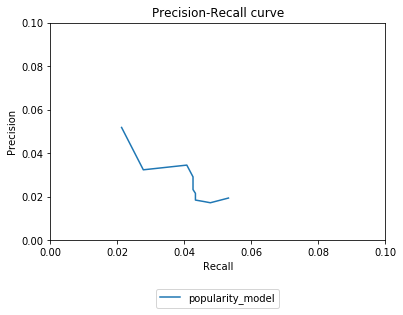

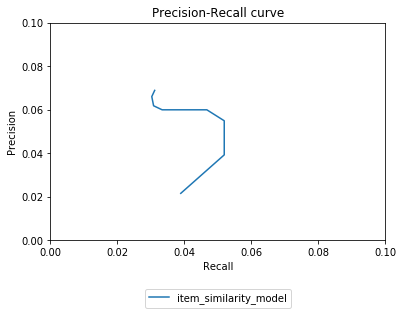

In [28]:
print("Plotting precision recall curves.")

plot_precision_recall(pm_avg_precision_list, pm_avg_recall_list, "popularity_model")
plot_precision_recall(ism_avg_precision_list, ism_avg_recall_list, "item_similarity_model")
